In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bike-sharing-dataset


In [2]:
import os

files = os.listdir(path)
print(files)

['hour.csv', 'Readme.txt', 'day.csv']


In [ ]:
# import pandas as pd

# # Suppose you see 'hour.csv' and 'day.csv' inside the folder
# hour_data = pd.read_csv(os.path.join(path, "hour.csv"))
# day_data = pd.read_csv(os.path.join(path, "day.csv"))

# print(hour_data.head())
# print(day_data.head())

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [4]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import DBSCAN
# Install tslearn if needed
try:
    import tslearn
except ImportError:
    !pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import cdist_dtw
import kagglehub
import os
from sklearn.metrics import pairwise_distances
from sklearn.cluster import OPTICS


# Download and load data
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")
data = pd.read_csv(os.path.join(path, "hour.csv"))

# Preprocessing
data['dteday'] = pd.to_datetime(data['dteday'])
grouped = data.groupby('dteday')['cnt'].apply(list)
time_series_data = grouped[grouped.apply(lambda x: len(x) == 24)].to_list()
time_series_data = np.array(time_series_data)

# Normalize each day
scaler = StandardScaler()
normalized_data = np.array([scaler.fit_transform(np.array(day).reshape(-1, 1)).flatten() for day in time_series_data])

# Optional downsampling (to 12 hours per day) for speed
normalized_data = normalized_data[:, ::2]

# Subsample to 200 days if large
np.random.seed(42)
if len(normalized_data) > 200:
    idx = np.random.choice(len(normalized_data), 200, replace=False)
    normalized_data = normalized_data[idx]

# Function to shift time series left or right
def shift_time_series(data, shift_steps):
    """Shift the time series data by a given number of time steps."""
    shifted_data = []
    for series in data:
        if shift_steps > 0:  # Shift right (append zeros at the beginning)
            shifted_series = np.concatenate([np.zeros(shift_steps), series[:-shift_steps]])
        elif shift_steps < 0:  # Shift left (append zeros at the end)
            shifted_series = np.concatenate([series[-shift_steps:], np.zeros(-shift_steps)])
        else:  # No shift
            shifted_series = series
        shifted_data.append(shifted_series)
    return np.array(shifted_data)

# Shift data: Example shift 3 hours right (shift_steps = 1)
shifted_data = shift_time_series(normalized_data[:60], shift_steps=1)
shifted_data = np.concatenate([shifted_data, normalized_data[60:]])

# Convert to tslearn format
from tslearn.utils import to_time_series_dataset
data_tslearn = to_time_series_dataset(shifted_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 14.1 MB/s eta 0:00:00



Running Elbow Method for metric = euclidean...
  Fitting KMeans with k = 1...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 2...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 3...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 4...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 5...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 6...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


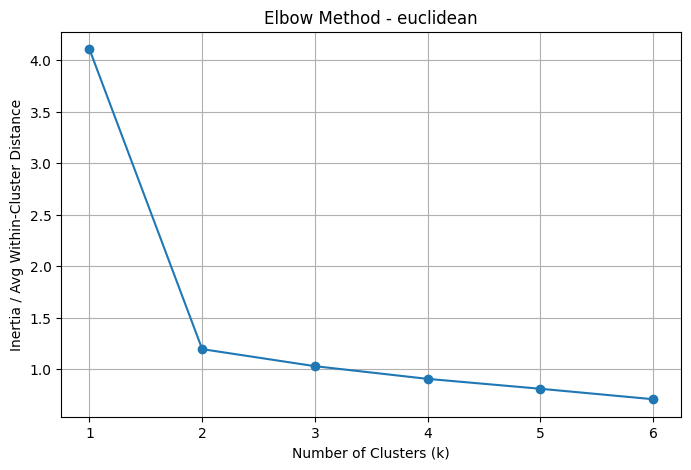


Running Elbow Method for metric = dtw...
  Fitting KMeans with k = 1...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 2...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 3...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 4...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 5...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


  Fitting KMeans with k = 6...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


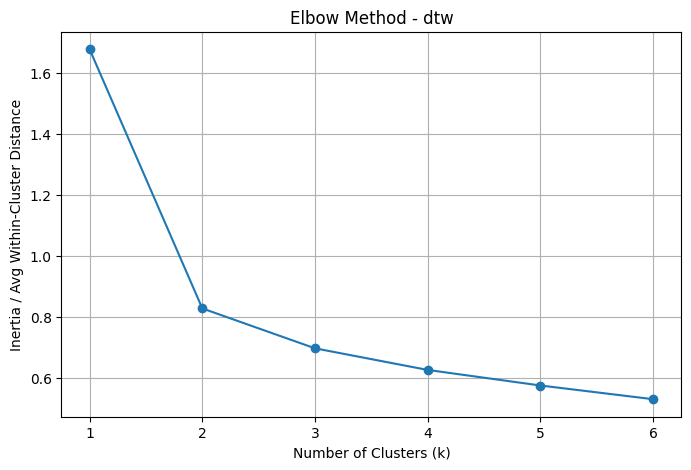

In [5]:
def elbow_method(data, metric="euclidean", max_k=6, metric_params=None):
    inertias = []
    print(f"\nRunning Elbow Method for metric = {metric}...")
    for k in range(1, max_k + 1):
        print(f"  Fitting KMeans with k = {k}...")
        model = TimeSeriesKMeans(n_clusters=k, metric=metric,
                                  metric_params=metric_params,
                                  random_state=42, n_init=10)
        labels = model.fit_predict(normalized_data)

        # Use built-in inertia for Euclidean, else estimate
        if hasattr(model, 'inertia_'):
            inertia = model.inertia_
        else:
            inertia = np.mean([
                np.mean([model._distance_func_(series, model.cluster_centers_[label])
                         for series, label in zip(data, labels)])
            ])
        inertias.append(inertia)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title(f"Elbow Method - {metric}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia / Avg Within-Cluster Distance")
    plt.grid(True)
    plt.show()
elbow_method(normalized_data, metric="euclidean")
elbow_method(normalized_data, metric="dtw")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

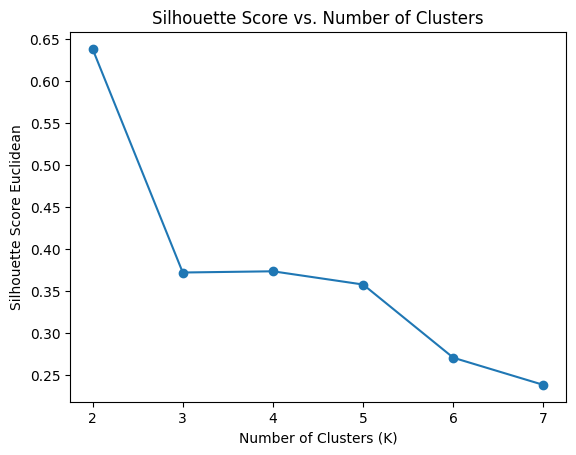

The optimal number of clusters (K) is: 2


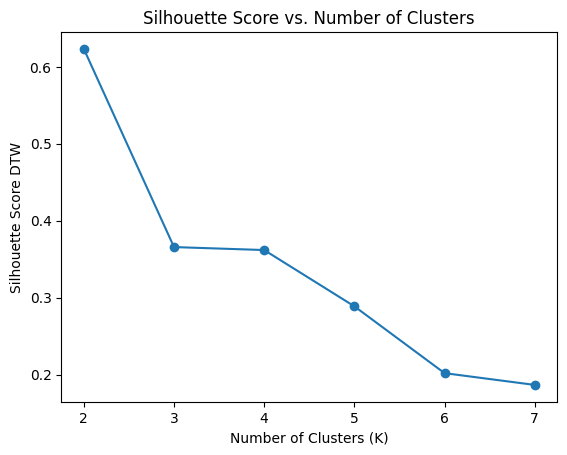

The optimal number of clusters (K) is: 2


In [6]:
# Range of K values to try (e.g., from 2 to 7 clusters)
K_range = range(2, 8)

# List to store silhouette scores for each K
silhouette_scores = []
silhouette_scores1 = []

# Loop over the range of K
for k in K_range:
    model = TimeSeriesKMeans(n_clusters=k, metric='euclidean',
                                  metric_params=None,
                                  random_state=42, n_init=7)
    labels = model.fit_predict(normalized_data)
    score = silhouette_score(normalized_data, labels)  # Calculate the silhouette score
    silhouette_scores.append(score)

for k in K_range:
    model1 = TimeSeriesKMeans(n_clusters=k, metric='dtw',
                                  metric_params=None,
                                  random_state=42, n_init=7)
    labels1 = model1.fit_predict(normalized_data)
    score1 = silhouette_score(normalized_data, labels1)  # Calculate the silhouette score
    silhouette_scores1.append(score1)


# Plot the silhouette scores for each K
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score Euclidean')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Find the K with the highest silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_k}")

# Plot the silhouette scores for each K
plt.plot(K_range, silhouette_scores1, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score DTW')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Find the K with the highest silhouette score
optimal_k1 = K_range[np.argmax(silhouette_scores1)]
print(f"The optimal number of clusters (K) is: {optimal_k1}")


Running KMeans with Euclidean KMeans...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


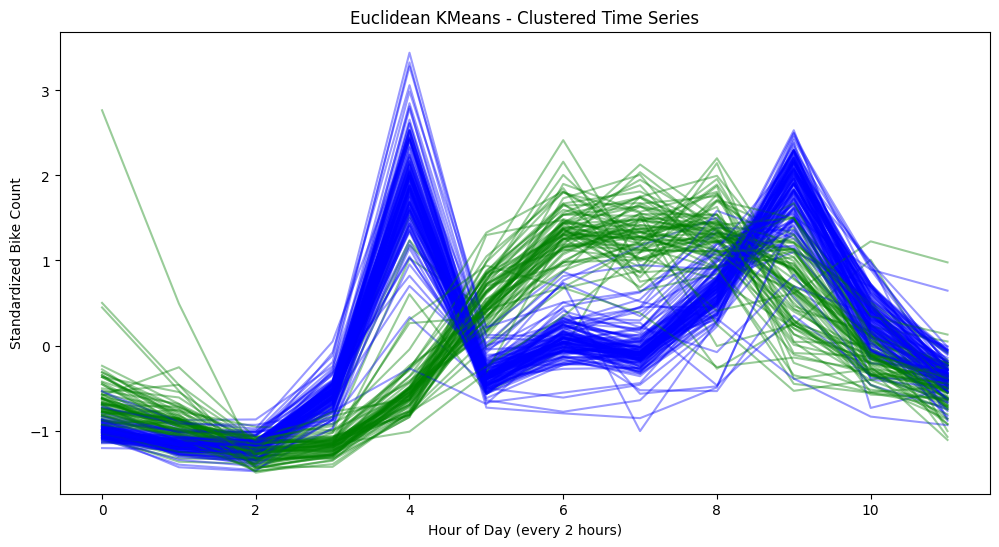

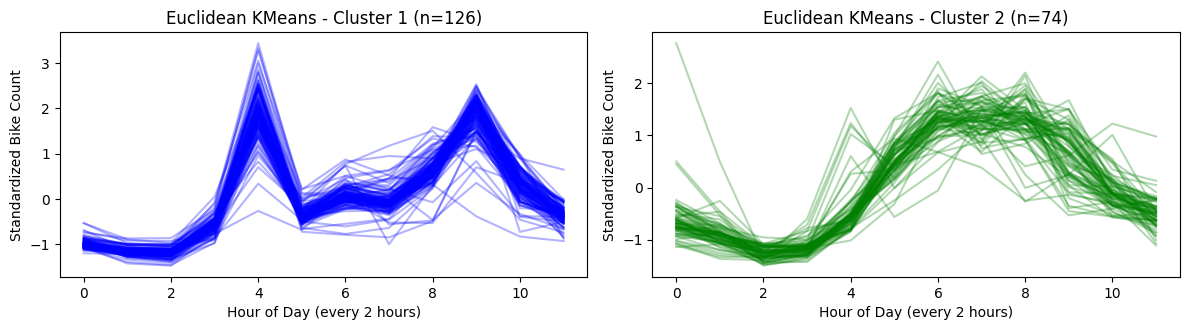

Silhouette Score: 0.6382307698179323 for K-Means with euclidean
Davies-Bouldin Score: 0.5433107709535842 for K-Means with euclidean

Running KMeans with DTW KMeans...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


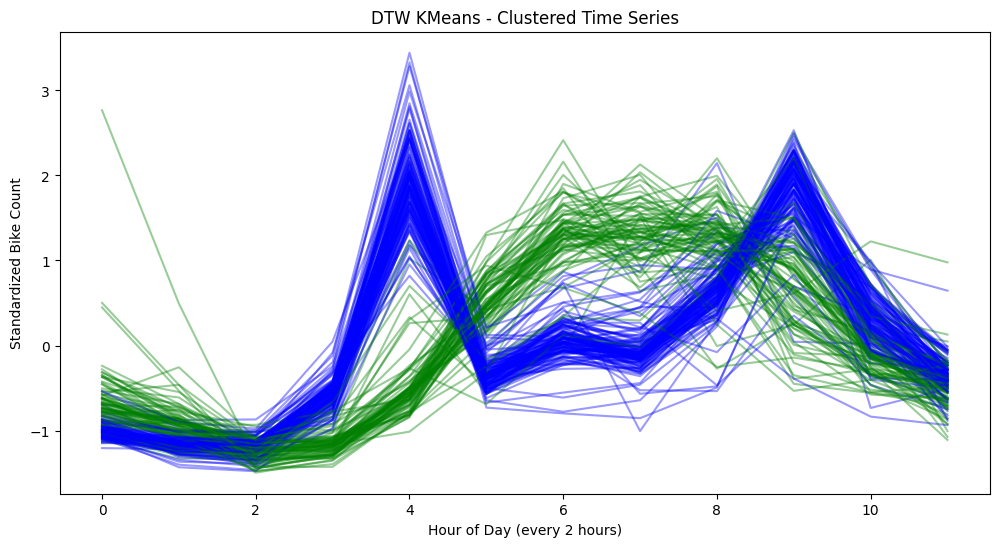

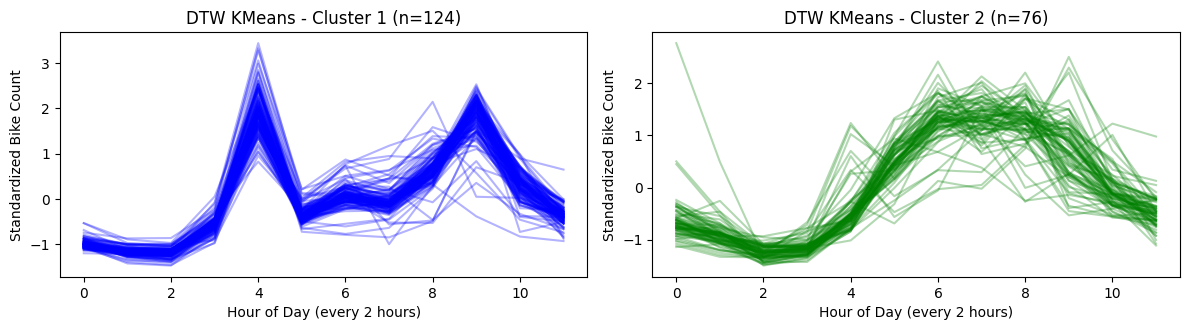

Silhouette Score: 0.6232251194521371 for K-Means with dtw
Davies-Bouldin Score: 0.5664676033027363 for K-Means with dtw


In [7]:
# Parameters
n_clusters = 2
colors = ["blue", "green", "red", "purple", "orange"]

# Clustering and plotting function
def run_kmeans(metric, title, metric_params=None):
    print(f"\nRunning KMeans with {title}...")
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric,
                              metric_params=metric_params,
                              random_state=42, n_init=10)
    labels = model.fit_predict(normalized_data)

    # Plot all series colored by cluster
    plt.figure(figsize=(12, 6))
    for i, series in enumerate(normalized_data):
        plt.plot(series.ravel(), color=colors[labels[i]], alpha=0.4)
    plt.title(f"{title} - Clustered Time Series")
    plt.xlabel("Hour of Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plt.show()

    # Plot cluster-wise breakdown
    plt.figure(figsize=(12, 6))
    for i in range(n_clusters):
        cluster_data = normalized_data[labels == i]
        plt.subplot(2, 2, i + 1)
        for series in cluster_data:
            plt.plot(series.ravel(), color=colors[i], alpha=0.3)
        plt.title(f"{title} - Cluster {i+1} (n={len(cluster_data)})")
        plt.xlabel("Hour of Day (every 2 hours)")
        plt.ylabel("Standardized Bike Count")
    plt.tight_layout()
    plt.show()

    # # Plot cluster means
    # plt.figure(figsize=(10, 6))
    # for i in range(n_clusters):
    #     mean_pattern = normalized_data[labels == i].mean(axis=0)
    #     plt.plot(mean_pattern.ravel(), label=f"Cluster {i+1}", color=colors[i])
    # plt.title(f"{title} - Average Pattern per Cluster")
    # plt.xlabel("Hour of Day (every 2 hours)")
    # plt.ylabel("Standardized Bike Count")
    # plt.legend()
    # plt.show()

    # Print mean per cluster
    cluster_means = [np.mean(normalized_data[labels == i]) for i in range(n_clusters)]
    # print(f"{title} - Average standardized rentals per cluster:")
    # for i, m in enumerate(cluster_means):
    #     print(f"  Cluster {i+1}: {m:.2f}")

    silhoutte_score = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score: {silhoutte_score} for K-Means with {metric}")
    db_score = davies_bouldin_score(normalized_data, labels)
    print(f"Davies-Bouldin Score: {db_score} for K-Means with {metric}")

# === Run all three clustering methods ===
run_kmeans(metric="euclidean", title="Euclidean KMeans")

run_kmeans(metric="dtw", title="DTW KMeans")

# run_kmeans(metric="softdtw", title="Soft-DTW KMeans", metric_params={"gamma": 0.01})



Running KMeans with Euclidean KMeans...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


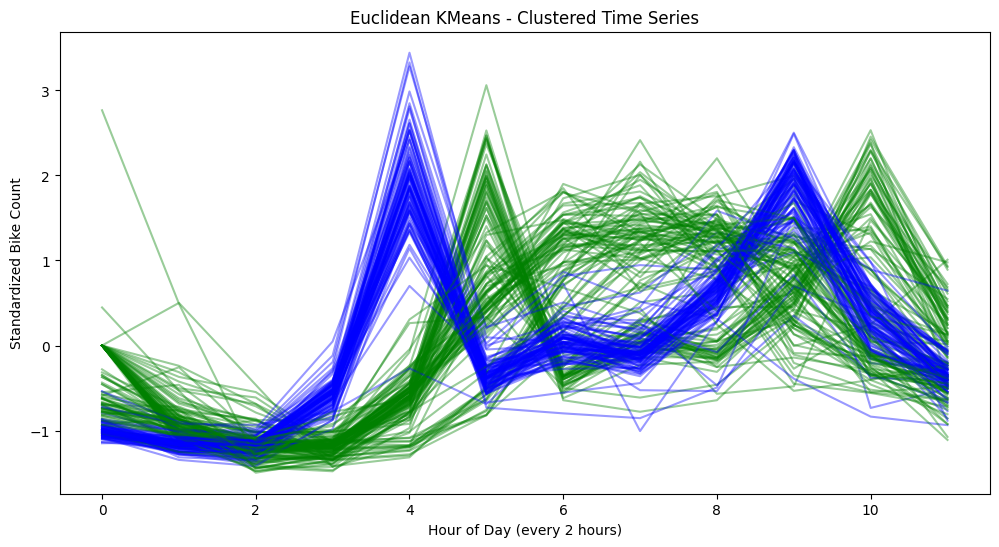

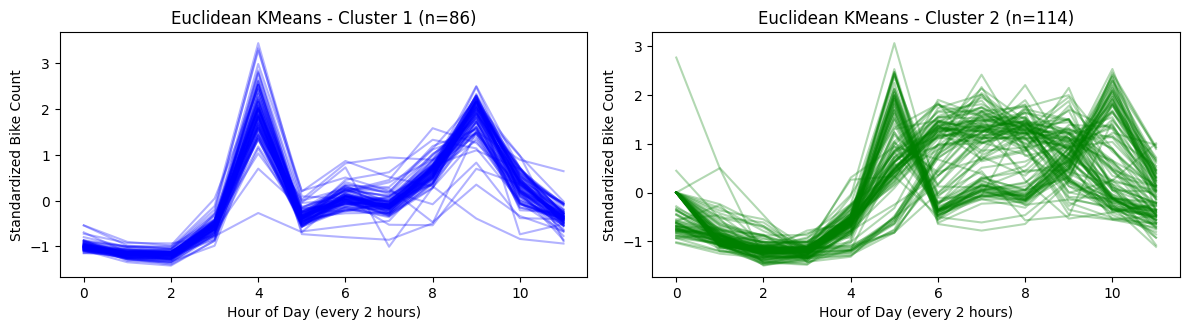

Silhouette Score: 0.4999002477157326 for K-Means with euclidean
Davies-Bouldin Score: 0.8278616188035811 for K-Means with euclidean

Running KMeans with DTW KMeans...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


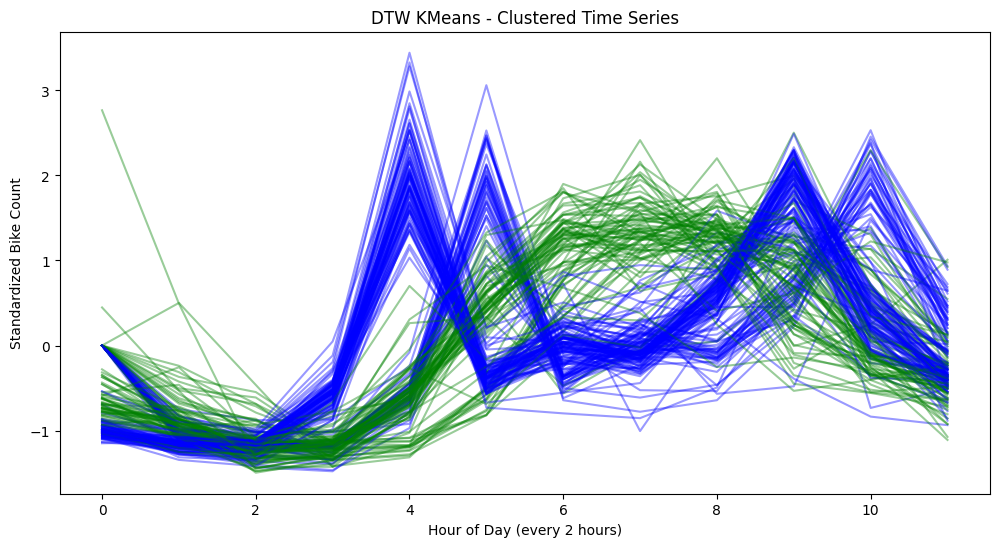

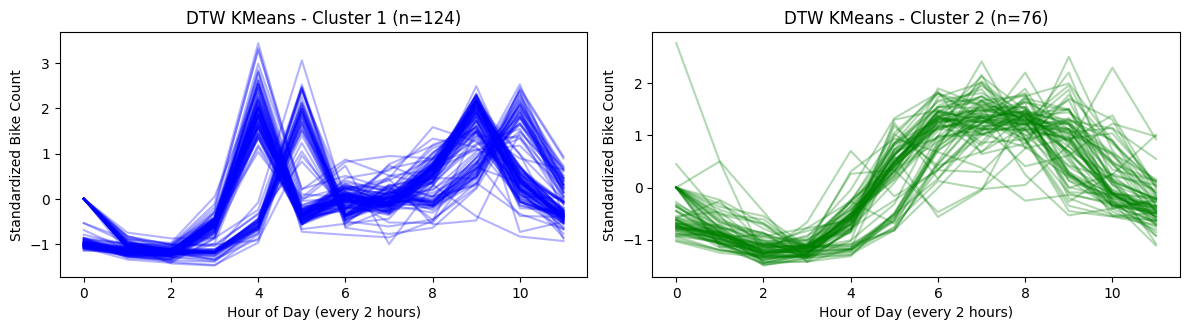

Silhouette Score: 0.38120810219621226 for K-Means with dtw
Davies-Bouldin Score: 1.202644292960396 for K-Means with dtw


In [8]:
# Parameters
n_clusters = 2
colors = ["blue", "green", "red", "purple", "orange"]

# Clustering and plotting function
def run_kmeans(metric, title, metric_params=None):
    print(f"\nRunning KMeans with {title}...")
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric,
                              metric_params=metric_params,
                              random_state=42, n_init=10)
    labels = model.fit_predict(data_tslearn)

    # Plot all series colored by cluster
    plt.figure(figsize=(12, 6))
    for i, series in enumerate(data_tslearn):
        plt.plot(series.ravel(), color=colors[labels[i]], alpha=0.4)
    plt.title(f"{title} - Clustered Time Series")
    plt.xlabel("Hour of Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plt.show()

    # Plot cluster-wise breakdown
    plt.figure(figsize=(12, 6))
    for i in range(n_clusters):
        cluster_data = data_tslearn[labels == i]
        plt.subplot(2, 2, i + 1)
        for series in cluster_data:
            plt.plot(series.ravel(), color=colors[i], alpha=0.3)
        plt.title(f"{title} - Cluster {i+1} (n={len(cluster_data)})")
        plt.xlabel("Hour of Day (every 2 hours)")
        plt.ylabel("Standardized Bike Count")
    plt.tight_layout()
    plt.show()

    # Plot cluster means
    # plt.figure(figsize=(10, 6))
    # for i in range(n_clusters):
    #     mean_pattern = data_tslearn[labels == i].mean(axis=0)
    #     plt.plot(mean_pattern.ravel(), label=f"Cluster {i+1}", color=colors[i])
    # plt.title(f"{title} - Average Pattern per Cluster")
    # plt.xlabel("Hour of Day (every 2 hours)")
    # plt.ylabel("Standardized Bike Count")
    # plt.legend()
    # plt.show()

    # Print mean per cluster
    cluster_means = [np.mean(data_tslearn[labels == i]) for i in range(n_clusters)]
    # print(f"{title} - Average standardized rentals per cluster:")
    # for i, m in enumerate(cluster_means):
    #     print(f"  Cluster {i+1}: {m:.2f}")

    silhoutte_score = silhouette_score(shifted_data, labels)
    print(f"Silhouette Score: {silhoutte_score} for K-Means with {metric}")
    db_score = davies_bouldin_score(shifted_data, labels)
    print(f"Davies-Bouldin Score: {db_score} for K-Means with {metric}")

# === Run all three clustering methods ===
run_kmeans(metric="euclidean", title="Euclidean KMeans")

run_kmeans(metric="dtw", title="DTW KMeans")

# run_kmeans(metric="softdtw", title="Soft-DTW KMeans", metric_params={"gamma": 0.01})


<ipython-input-9-20bd6cf0a793>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_euclidean = linkage(euclidean_dist, method='ward')  # 'ward' assumes Euclidean


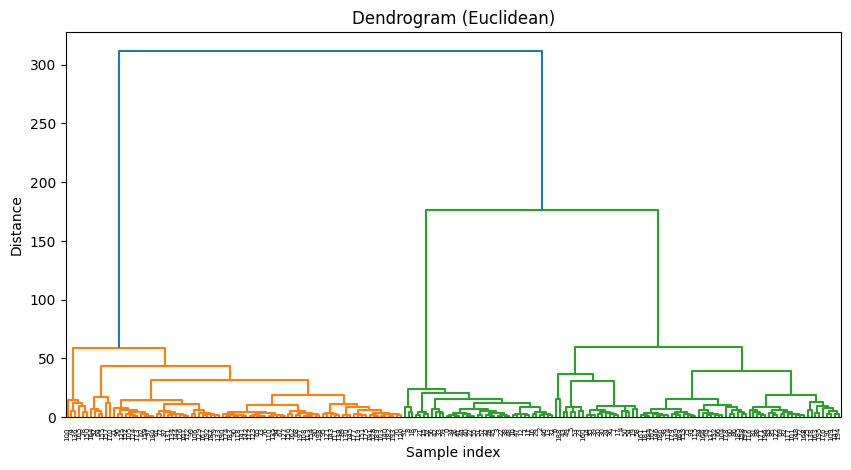

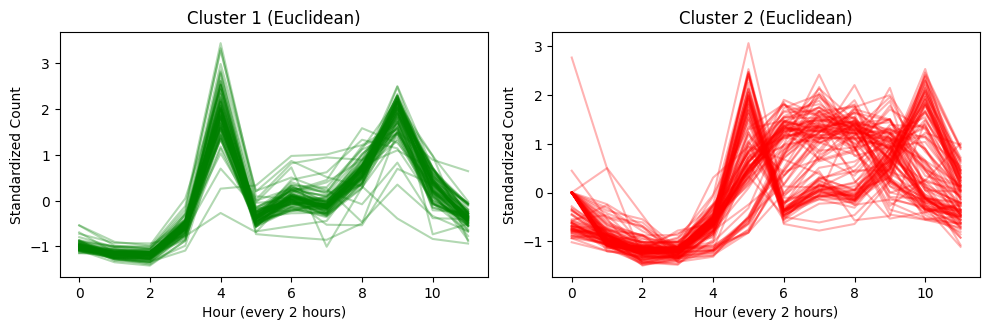

Silhouette Score: 0.49716314428733455 for Hierarchical with Euclidean
Davies-Bouldin Score: 0.8370364061770136 for Hierarchical with Euclidean


In [9]:
# Compute Euclidean distance matrix
euclidean_dist = pairwise_distances(shifted_data, metric='euclidean')

# Linkage (hierarchical clustering)
Z_euclidean = linkage(euclidean_dist, method='ward')  # 'ward' assumes Euclidean

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z_euclidean)
plt.title("Dendrogram (Euclidean)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels
n_clusters = 2
labels_euclidean = fcluster(Z_euclidean, n_clusters, criterion='maxclust')

# Plot each cluster
colors = ["blue", "green", "red", "orange", "purple", "black"]
plt.figure(figsize=(10, 3 * n_clusters))
for i in range(1, n_clusters + 1):
    plt.subplot(n_clusters, 2, i)
    for ts in shifted_data[labels_euclidean == i]:
        plt.plot(ts, color=colors[i % len(colors)], alpha=0.3)
    plt.title(f"Cluster {i} (Euclidean)")
    plt.xlabel("Hour (every 2 hours)")
    plt.ylabel("Standardized Count")
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_euclidean)
print(f"Silhouette Score: {silhoutte_score} for Hierarchical with Euclidean")
db_score = davies_bouldin_score(shifted_data, labels_euclidean)
print(f"Davies-Bouldin Score: {db_score} for Hierarchical with Euclidean")


<ipython-input-10-6d771c487c6f>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_dtw = linkage(dtw_dist, method='average')


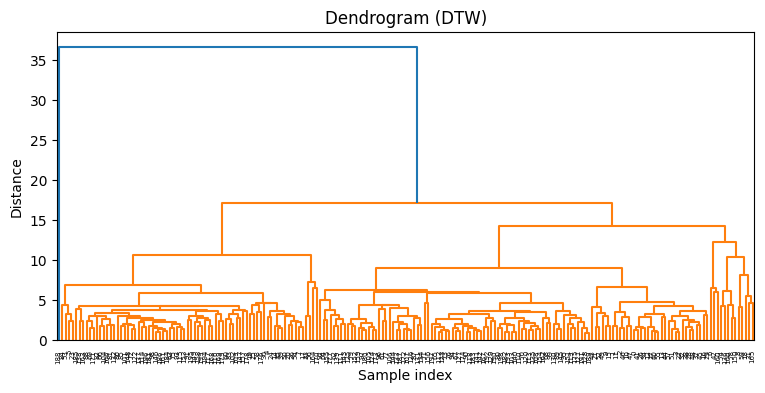

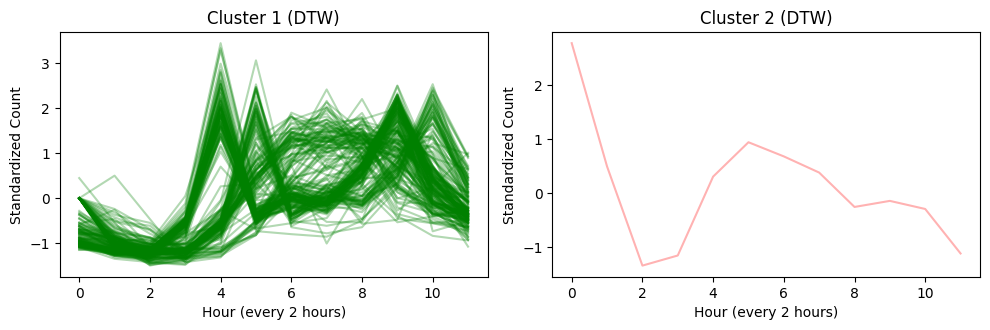

Silhouette Score: 0.3580176994175099 for Hierarchical with DTW
Davies-Bouldin Score: 0.547068408997187 for Hierarchical with DTW


In [10]:
# Compute DTW distance matrix
dtw_dist = cdist_dtw(shifted_data)

# Linkage (average is common for precomputed distances)
Z_dtw = linkage(dtw_dist, method='average')

# Plot dendrogram
plt.figure(figsize=(9, 4))
dendrogram(Z_dtw)
plt.title("Dendrogram (DTW)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels
n_clusters_dtw = 2
labels_dtw = fcluster(Z_dtw, n_clusters_dtw, criterion='maxclust')

# Plot each cluster
plt.figure(figsize=(10, 3 * n_clusters_dtw))
for i in range(1, n_clusters_dtw + 1):
    plt.subplot(n_clusters_dtw, 2, i)
    for ts in shifted_data[labels_dtw == i]:
        plt.plot(ts, color=colors[i % len(colors)], alpha=0.3)
    plt.title(f"Cluster {i} (DTW)")
    plt.xlabel("Hour (every 2 hours)")
    plt.ylabel("Standardized Count")
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_dtw)
print(f"Silhouette Score: {silhoutte_score} for Hierarchical with DTW")
db_score = davies_bouldin_score(shifted_data, labels_dtw)
print(f"Davies-Bouldin Score: {db_score} for Hierarchical with DTW")


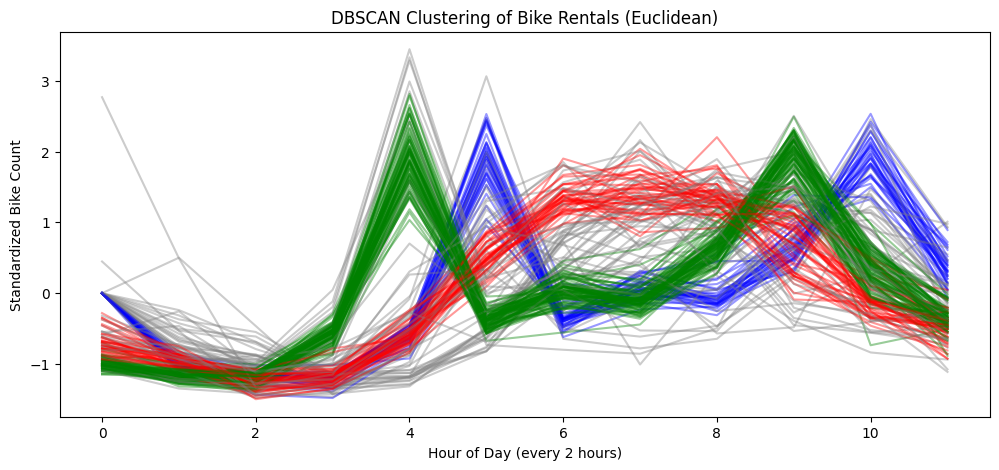

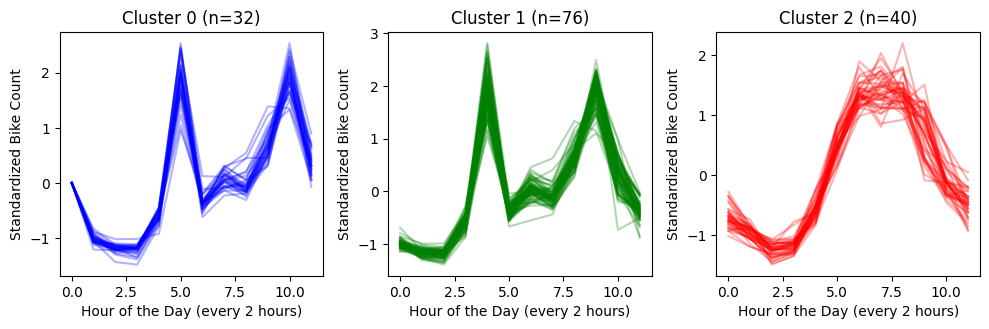

Silhouette Score: 0.43800416167235345 for DBSCAN with Euclidean
Davies-Bouldin Score: 1.5891982194049032 for DBSCAN with Euclidean
DBSCAN (Euclidean) Cluster Sizes (label - count):
  Cluster -1: 52 time series
  Cluster 0: 32 time series
  Cluster 1: 76 time series
  Cluster 2: 40 time series


In [11]:
# Compute Euclidean distance matrix
euclidean_dist_matrix = pairwise_distances(shifted_data, metric='euclidean')

# Apply DBSCAN clustering with Euclidean distance
db_euclidean = DBSCAN(eps=0.8, min_samples=10, metric='precomputed')
labels_euclidean = db_euclidean.fit_predict(euclidean_dist_matrix)

# Define plot colors
colors = ["blue", "green", "red", "purple", "orange", "black"]
unique_labels_euclidean = np.unique(labels_euclidean)

# Plot all series colored by cluster
plt.figure(figsize=(12, 5))
for i, series in enumerate(shifted_data):
    label = labels_euclidean[i]
    color = "gray" if label == -1 else colors[label % len(colors)]
    plt.plot(series, color=color, alpha=0.4)
plt.title("DBSCAN Clustering of Bike Rentals (Euclidean)")
plt.xlabel("Hour of Day (every 2 hours)")
plt.ylabel("Standardized Bike Count")
plt.show()

# Plot each cluster separately
n_clusters = len([l for l in unique_labels_euclidean if l != -1])
plt.figure(figsize=(10, 3 * n_clusters))
plot_idx = 1
for label in unique_labels_euclidean:
    if label == -1:
        continue
    cluster_data = shifted_data[labels_euclidean == label]
    plt.subplot(n_clusters, 3, plot_idx)
    for series in cluster_data:
        plt.plot(series.ravel(), color=colors[label % len(colors)], alpha=0.3)
    plt.title(f"Cluster {label} (n={len(cluster_data)})")
    plt.xlabel("Hour of the Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plot_idx += 1
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_euclidean)
print(f"Silhouette Score: {silhoutte_score} for DBSCAN with Euclidean")
db_score = davies_bouldin_score(shifted_data, labels_euclidean)
print(f"Davies-Bouldin Score: {db_score} for DBSCAN with Euclidean")

# Summary
print("DBSCAN (Euclidean) Cluster Sizes (label - count):")
for label in unique_labels_euclidean:
    print(f"  Cluster {label}: {(labels_euclidean == label).sum()} time series")


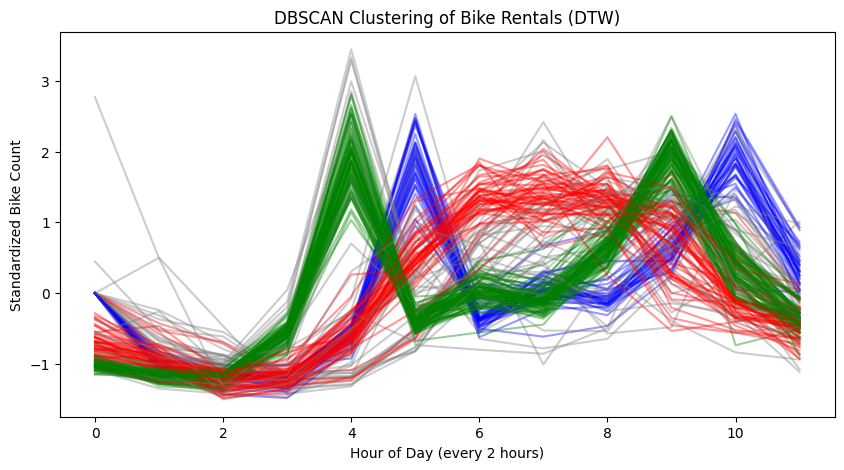

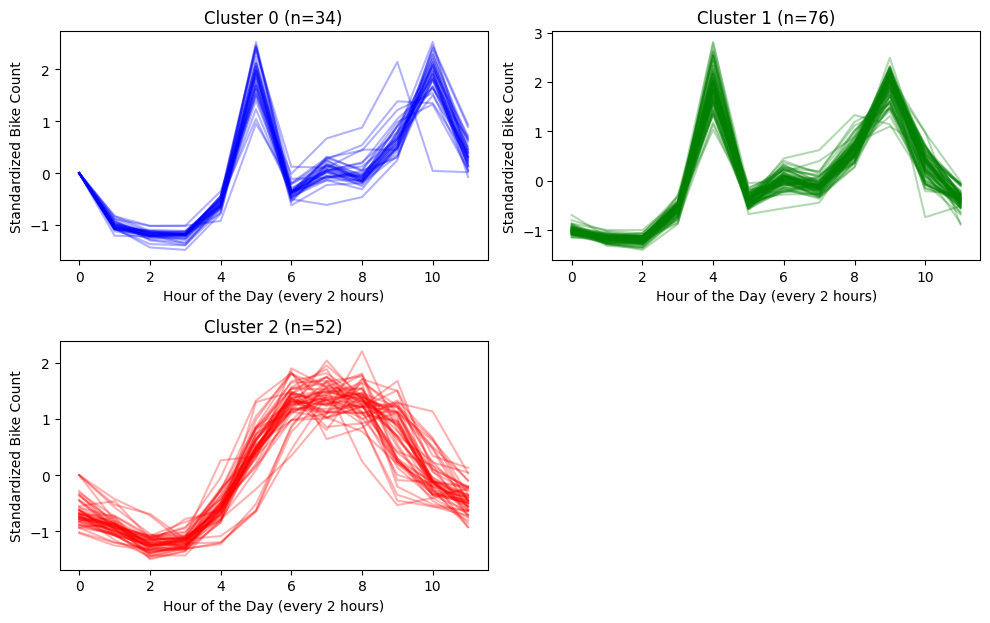

Silhouette Score: 0.4763929045033695 for DBSCAN with DTW
Davies-Bouldin Score: 1.6593349069001362 for DBSCAN with DTW
DBSCAN (DTW) Cluster Sizes (label - count):
  Cluster -1: 38 time series
  Cluster 0: 34 time series
  Cluster 1: 76 time series
  Cluster 2: 52 time series


In [12]:
# Compute DTW distance matrix
dtw_dist_matrix = cdist_dtw(shifted_data)

# Apply DBSCAN clustering with DTW
db_dtw = DBSCAN(eps=0.8, min_samples=10, metric='precomputed')
labels_dtw = db_dtw.fit_predict(dtw_dist_matrix)

# Define plot colors
colors = ["blue", "green", "red", "purple", "orange", "black"]
unique_labels_dtw = np.unique(labels_dtw)

# Plot all series colored by cluster
plt.figure(figsize=(10, 5))
for i, series in enumerate(shifted_data):
    label = labels_dtw[i]
    color = "gray" if label == -1 else colors[label % len(colors)]
    plt.plot(series, color=color, alpha=0.4)
plt.title("DBSCAN Clustering of Bike Rentals (DTW)")
plt.xlabel("Hour of Day (every 2 hours)")
plt.ylabel("Standardized Bike Count")
plt.show()

# Plot each cluster separately
n_clusters = len([l for l in unique_labels_dtw if l != -1])
plt.figure(figsize=(10, 3 * n_clusters))
plot_idx = 1
for label in unique_labels_dtw:
    if label == -1:
        continue
    cluster_data = shifted_data[labels_dtw == label]
    plt.subplot(n_clusters, 2, plot_idx)
    for series in cluster_data:
        plt.plot(series.ravel(), color=colors[label % len(colors)], alpha=0.3)
    plt.title(f"Cluster {label} (n={len(cluster_data)})")
    plt.xlabel("Hour of the Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plot_idx += 1
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_dtw)
print(f"Silhouette Score: {silhoutte_score} for DBSCAN with DTW")
db_score = davies_bouldin_score(shifted_data, labels_dtw)
print(f"Davies-Bouldin Score: {db_score} for DBSCAN with DTW")

# Print summary
print("DBSCAN (DTW) Cluster Sizes (label - count):")
for label in unique_labels_dtw:
    print(f"  Cluster {label}: {(labels_dtw == label).sum()} time series")

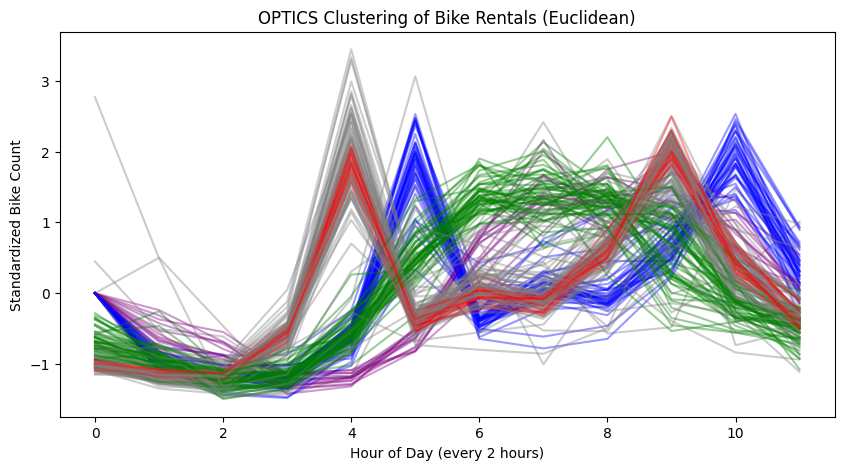

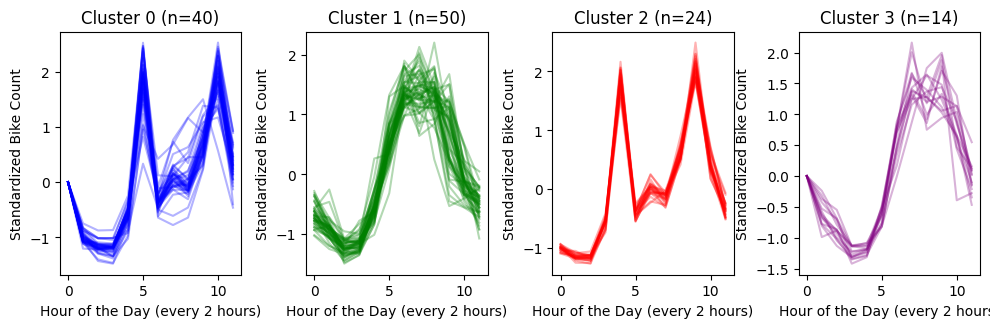

Silhouette Score: 0.21783602827956766 for OPTICS with Euclidean
Davies-Bouldin Score: 1.4895014332376004 for OPTICS with Euclidean
OPTICS (Euclidean) Cluster Sizes:
  Cluster -1: 72 time series
  Cluster 0: 40 time series
  Cluster 1: 50 time series
  Cluster 2: 24 time series
  Cluster 3: 14 time series


In [13]:
# Euclidean Distance Matrix
euclidean_dist_matrix = pairwise_distances(shifted_data, metric='euclidean')

# OPTICS Clustering
optics_euclidean = OPTICS(metric='precomputed', min_samples=10, xi=0.05)
labels_optics_euclidean = optics_euclidean.fit_predict(euclidean_dist_matrix)

# Plotting Results
colors = ["blue", "green", "red", "purple", "orange", "black"]
unique_labels = np.unique(labels_optics_euclidean)

# Plot all series colored by cluster
plt.figure(figsize=(10, 5))
for i, series in enumerate(shifted_data):
    label = labels_optics_euclidean[i]
    color = "gray" if label == -1 else colors[label % len(colors)]
    plt.plot(series, color=color, alpha=0.4)
plt.title("OPTICS Clustering of Bike Rentals (Euclidean)")
plt.xlabel("Hour of Day (every 2 hours)")
plt.ylabel("Standardized Bike Count")
plt.show()

# Plot each cluster separately
n_clusters = len([l for l in unique_labels if l != -1])
plt.figure(figsize=(10, 3 * n_clusters))
plot_idx = 1
for label in unique_labels:
    if label == -1:
        continue
    cluster_data = shifted_data[labels_optics_euclidean == label]
    plt.subplot(n_clusters, 4, plot_idx)
    for series in cluster_data:
        plt.plot(series.ravel(), color=colors[label % len(colors)], alpha=0.3)
    plt.title(f"Cluster {label} (n={len(cluster_data)})")
    plt.xlabel("Hour of the Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plot_idx += 1
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_optics_euclidean)
print(f"Silhouette Score: {silhoutte_score} for OPTICS with Euclidean")
db_score = davies_bouldin_score(shifted_data, labels_optics_euclidean)
print(f"Davies-Bouldin Score: {db_score} for OPTICS with Euclidean")

# Summary
print("OPTICS (Euclidean) Cluster Sizes:")
for label in unique_labels:
    print(f"  Cluster {label}: {(labels_optics_euclidean == label).sum()} time series")


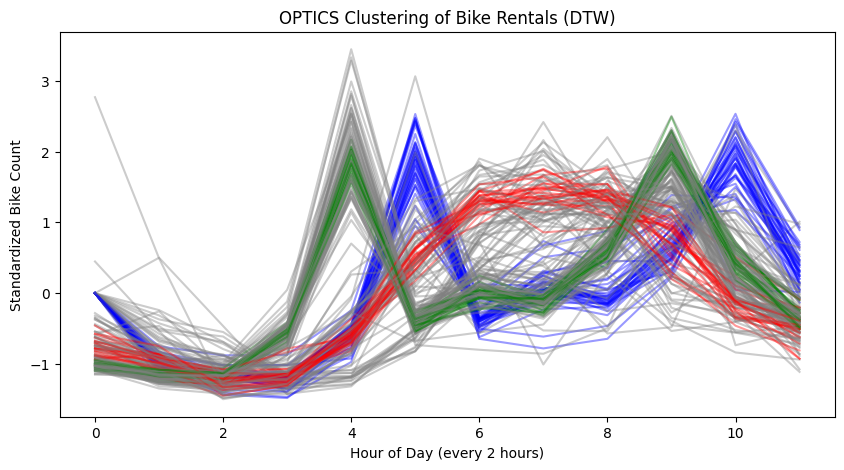

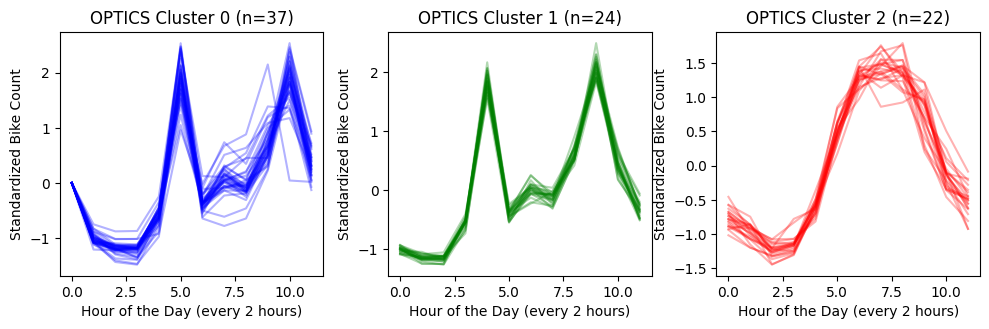

Silhouette Score: -0.013029484279049921 for OPTICS with DTW
Davies-Bouldin Score: 1.298581367836181 for OPTICS with DTW


In [14]:
# Compute DTW distance matrix
dtw_dist_matrix = cdist_dtw(shifted_data)

# OPTICS with DTW
optics_dtw = OPTICS(min_samples=10, metric='precomputed', cluster_method='xi', xi=0.05)
labels_optics_dtw = optics_dtw.fit_predict(dtw_dist_matrix)

# Unique labels
unique_labels_optics_dtw = np.unique(labels_optics_dtw)

# Plot all series colored by cluster
plt.figure(figsize=(10, 5))
for i, series in enumerate(shifted_data):
    label = labels_optics_dtw[i]
    color = "gray" if label == -1 else colors[label % len(colors)]
    plt.plot(series, color=color, alpha=0.4)
plt.title("OPTICS Clustering of Bike Rentals (DTW)")
plt.xlabel("Hour of Day (every 2 hours)")
plt.ylabel("Standardized Bike Count")
plt.show()

# Plot each cluster separately
n_clusters = len([l for l in unique_labels_optics_dtw if l != -1])
plt.figure(figsize=(10, 3 * n_clusters))
plot_idx = 1
for label in unique_labels_optics_dtw:
    if label == -1:
        continue
    cluster_data = shifted_data[labels_optics_dtw == label]
    plt.subplot(n_clusters, 3, plot_idx)
    for series in cluster_data:
        plt.plot(series.ravel(), color=colors[label % len(colors)], alpha=0.3)
    plt.title(f"OPTICS Cluster {label} (n={len(cluster_data)})")
    plt.xlabel("Hour of the Day (every 2 hours)")
    plt.ylabel("Standardized Bike Count")
    plot_idx += 1
plt.tight_layout()
plt.show()

silhoutte_score = silhouette_score(shifted_data, labels_optics_dtw)
print(f"Silhouette Score: {silhoutte_score} for OPTICS with DTW")
db_score = davies_bouldin_score(shifted_data, labels_optics_dtw)
print(f"Davies-Bouldin Score: {db_score} for OPTICS with DTW")
